In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:

r1=pd.read_csv("D:/My Projects/Singapure-Resale-flat_price -Prediction/ResaleFlatPricesBasedonApprovalDate19901999.csv")
r2=pd.read_csv("D:/My Projects/Singapure-Resale-flat_price -Prediction/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
r3=pd.read_csv("D:/My Projects/Singapure-Resale-flat_price -Prediction/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
r4=pd.read_csv("D:/My Projects/Singapure-Resale-flat_price -Prediction/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
r5=pd.read_csv("D:/My Projects/Singapure-Resale-flat_price -Prediction/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")


In [85]:
df=pd.concat([r1,r2,r3,r4,r5],ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932367,2024-08,YISHUN,4 ROOM,468A,YISHUN ST 43,07 TO 09,93.0,Model A,2019,580000.0,94 years 05 months
932368,2024-08,YISHUN,4 ROOM,640A,YISHUN ST 61,01 TO 03,91.0,New Generation,1992,485000.0,66 years 11 months
932369,2024-08,YISHUN,4 ROOM,762,YISHUN ST 72,10 TO 12,84.0,Simplified,1985,488000.0,60 years 03 months
932370,2024-08,YISHUN,5 ROOM,658,YISHUN AVE 4,01 TO 03,121.0,Improved,1987,630000.0,62 years 02 months


In [86]:
df.duplicated().sum()

1899

In [87]:
df.info()# here no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932372 entries, 0 to 932371
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                932372 non-null  object 
 1   town                 932372 non-null  object 
 2   flat_type            932372 non-null  object 
 3   block                932372 non-null  object 
 4   street_name          932372 non-null  object 
 5   storey_range         932372 non-null  object 
 6   floor_area_sqm       932372 non-null  float64
 7   flat_model           932372 non-null  object 
 8   lease_commence_date  932372 non-null  int64  
 9   resale_price         932372 non-null  float64
 10  remaining_lease      223322 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.2+ MB


In [88]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [89]:
df.resale_price.value_counts()

resale_price
300000.00     6934
350000.00     6870
280000.00     6554
320000.00     6539
380000.00     6326
              ... 
182888.88        1
280750.00        1
390300.00        1
142008.00        1
1006666.00       1
Name: count, Length: 9590, dtype: int64

In [90]:
df.resale_price.nunique()

9590

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,932372.0,95.687326,25.816280,28.0,73.0,93.0,113.0,366.7
lease_commence_date,932372.0,1988.331706,10.719523,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,932372.0,322407.117832,171986.419522,5000.0,194000.0,299000.0,420000.0,1588000.0


DATA CLEANING

In [92]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932367,2024-08,YISHUN,4 ROOM,468A,YISHUN ST 43,07 TO 09,93.0,Model A,2019,580000.0,94 years 05 months
932368,2024-08,YISHUN,4 ROOM,640A,YISHUN ST 61,01 TO 03,91.0,New Generation,1992,485000.0,66 years 11 months
932369,2024-08,YISHUN,4 ROOM,762,YISHUN ST 72,10 TO 12,84.0,Simplified,1985,488000.0,60 years 03 months
932370,2024-08,YISHUN,5 ROOM,658,YISHUN AVE 4,01 TO 03,121.0,Improved,1987,630000.0,62 years 02 months


DATA CLEANING FOR REMAINING LEASE COLUMN

In [93]:
df.remaining_lease.iloc[0]

nan

In [94]:
def convert_year(x):
    if pd.notna(x) and isinstance(x, str):
        if 'years'in x:
            y=x.split()
            year=float(y[0])
            month=float((y[2])) if len(y)>2 else 0
            return year+month/12
    return x

In [95]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_year)

In [96]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932367,2024-08,YISHUN,4 ROOM,468A,YISHUN ST 43,07 TO 09,93.0,Model A,2019,580000.0,94.416667
932368,2024-08,YISHUN,4 ROOM,640A,YISHUN ST 61,01 TO 03,91.0,New Generation,1992,485000.0,66.916667
932369,2024-08,YISHUN,4 ROOM,762,YISHUN ST 72,10 TO 12,84.0,Simplified,1985,488000.0,60.250000
932370,2024-08,YISHUN,5 ROOM,658,YISHUN AVE 4,01 TO 03,121.0,Improved,1987,630000.0,62.166667


In [97]:
df.remaining_lease.isna().sum()# so We cant remove null values 

709050

In [98]:
df.remaining_lease.mode()[0]

68.0

In [99]:
# Filling of null values with mode 
df.remaining_lease.fillna(df.remaining_lease.mode()[0],inplace=True)

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\861552251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.remaining_lease.fillna(df.remaining_lease.mode()[0],inplace=True)


In [100]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.000000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.000000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.000000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.000000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...
932367,2024-08,YISHUN,4 ROOM,468A,YISHUN ST 43,07 TO 09,93.0,Model A,2019,580000.0,94.416667
932368,2024-08,YISHUN,4 ROOM,640A,YISHUN ST 61,01 TO 03,91.0,New Generation,1992,485000.0,66.916667
932369,2024-08,YISHUN,4 ROOM,762,YISHUN ST 72,10 TO 12,84.0,Simplified,1985,488000.0,60.250000
932370,2024-08,YISHUN,5 ROOM,658,YISHUN AVE 4,01 TO 03,121.0,Improved,1987,630000.0,62.166667


In [101]:
df.remaining_lease.value_counts()

remaining_lease
68.000000    711660
95.000000      2420
67.000000      2212
69.000000      1915
71.000000      1773
              ...  
97.416667         1
97.583333         1
97.750000         1
97.083333         1
97.250000         1
Name: count, Length: 674, dtype: int64

In [102]:
df.remaining_lease.isna().sum()

0

Handling of month  AND block column

In [103]:
# Separate the year and month of resale beacuse this is time series Data
df[['resale_year','resale_month']]=df.month.str.split("-",expand=True)
df.resale_year=pd.to_numeric(df.resale_year)
df.resale_month=pd.to_numeric(df.resale_month)


#BLOCK COLUMN
df['address'] = df['block'] + " BLOCK AND " + df['street_name']
# drop the resale month column
df.drop(['month','block','street_name'], axis = 1, inplace= True)

df.head(10)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,address
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,1,309 BLOCK AND ANG MO KIO AVE 1
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,1,309 BLOCK AND ANG MO KIO AVE 1
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0,1990,1,309 BLOCK AND ANG MO KIO AVE 1
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0,1990,1,309 BLOCK AND ANG MO KIO AVE 1
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,216 BLOCK AND ANG MO KIO AVE 1
5,ANG MO KIO,3 ROOM,01 TO 03,67.0,NEW GENERATION,1977,46000.0,68.0,1990,1,211 BLOCK AND ANG MO KIO AVE 3
6,ANG MO KIO,3 ROOM,07 TO 09,67.0,NEW GENERATION,1977,42000.0,68.0,1990,1,202 BLOCK AND ANG MO KIO AVE 3
7,ANG MO KIO,3 ROOM,10 TO 12,67.0,NEW GENERATION,1977,38000.0,68.0,1990,1,235 BLOCK AND ANG MO KIO AVE 3
8,ANG MO KIO,3 ROOM,04 TO 06,67.0,NEW GENERATION,1977,40000.0,68.0,1990,1,235 BLOCK AND ANG MO KIO AVE 3
9,ANG MO KIO,3 ROOM,01 TO 03,67.0,NEW GENERATION,1977,47000.0,68.0,1990,1,232 BLOCK AND ANG MO KIO AVE 3


In [104]:
df.address.iloc[0]

'309 BLOCK AND ANG MO KIO AVE 1'

In [105]:
# Split the 'Range' column into lower and max value
df[['storey_min','storey_max']]=df.storey_range.str.split("TO",expand=True)
df.storey_min=pd.to_numeric(df.storey_min)
df.storey_max=pd.to_numeric(df.storey_max)
df.drop('storey_range',inplace=True,axis=1)


In [106]:
df.tail(5)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,address,storey_min,storey_max
932367,YISHUN,4 ROOM,93.0,Model A,2019,580000.0,94.416667,2024,8,468A BLOCK AND YISHUN ST 43,7,9
932368,YISHUN,4 ROOM,91.0,New Generation,1992,485000.0,66.916667,2024,8,640A BLOCK AND YISHUN ST 61,1,3
932369,YISHUN,4 ROOM,84.0,Simplified,1985,488000.0,60.250000,2024,8,762 BLOCK AND YISHUN ST 72,10,12
932370,YISHUN,5 ROOM,121.0,Improved,1987,630000.0,62.166667,2024,8,658 BLOCK AND YISHUN AVE 4,1,3
932371,YISHUN,5 ROOM,122.0,Improved,1988,708000.0,63.166667,2024,8,860 BLOCK AND YISHUN AVE 4,4,6


HANDLING OF OBJECT DATA TYPE COLUMNS

In [107]:
df.to_csv('resale_csv')

In [108]:
x=df.select_dtypes(include='object').columns
x

Index(['town', 'flat_type', 'flat_model', 'address'], dtype='object')

In [109]:
df['town'].value_counts()


town
TAMPINES           80336
YISHUN             70415
JURONG WEST        67060
BEDOK              66916
WOODLANDS          65909
ANG MO KIO         52300
HOUGANG            51008
BUKIT BATOK        44755
CHOA CHU KANG      38573
BUKIT MERAH        34560
PASIR RIS          33345
SENGKANG           32868
TOA PAYOH          31699
QUEENSTOWN         28910
GEYLANG            28321
CLEMENTI           28152
BUKIT PANJANG      27845
KALLANG/WHAMPOA    27374
JURONG EAST        24884
SERANGOON          22914
BISHAN             21349
PUNGGOL            21038
SEMBAWANG          14002
MARINE PARADE       8062
CENTRAL AREA        7184
BUKIT TIMAH         2529
LIM CHU KANG          64
Name: count, dtype: int64

In [110]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

flat_type COLUMN HANDLING

In [111]:
df['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [112]:

df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [113]:
df['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [114]:
df.address.unique()

array(['309 BLOCK AND ANG MO KIO AVE 1', '216 BLOCK AND ANG MO KIO AVE 1',
       '211 BLOCK AND ANG MO KIO AVE 3', ...,
       '455A BLOCK AND SENGKANG WEST AVE', '118A BLOCK AND CANBERRA CRES',
       '117B BLOCK AND CANBERRA CRES'], dtype=object)

In [115]:
a=list(df.address.unique())
len(a)
a

['309 BLOCK AND ANG MO KIO AVE 1',
 '216 BLOCK AND ANG MO KIO AVE 1',
 '211 BLOCK AND ANG MO KIO AVE 3',
 '202 BLOCK AND ANG MO KIO AVE 3',
 '235 BLOCK AND ANG MO KIO AVE 3',
 '232 BLOCK AND ANG MO KIO AVE 3',
 '308 BLOCK AND ANG MO KIO AVE 1',
 '220 BLOCK AND ANG MO KIO AVE 1',
 '219 BLOCK AND ANG MO KIO AVE 1',
 '247 BLOCK AND ANG MO KIO AVE 3',
 '320 BLOCK AND ANG MO KIO AVE 1',
 '252 BLOCK AND ANG MO KIO AVE 4',
 '223 BLOCK AND ANG MO KIO AVE 1',
 '230 BLOCK AND ANG MO KIO AVE 3',
 '329 BLOCK AND ANG MO KIO AVE 3',
 '313 BLOCK AND ANG MO KIO AVE 3',
 '117 BLOCK AND ANG MO KIO AVE 4',
 '110 BLOCK AND ANG MO KIO AVE 4',
 '343 BLOCK AND ANG MO KIO AVE 3',
 '345 BLOCK AND ANG MO KIO AVE 3',
 '346 BLOCK AND ANG MO KIO AVE 3',
 '121 BLOCK AND ANG MO KIO AVE 3',
 '129 BLOCK AND ANG MO KIO AVE 3',
 '130 BLOCK AND ANG MO KIO AVE 3',
 '128 BLOCK AND ANG MO KIO AVE 3',
 '127 BLOCK AND ANG MO KIO AVE 3',
 '126 BLOCK AND ANG MO KIO AVE 3',
 '403 BLOCK AND ANG MO KIO AVE 10',
 '404 BLOCK AND ANG

FLAT_MODEL COLUMN HANDLING

In [116]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [117]:
df.flat_model = df.flat_model.replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [118]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [119]:
df.duplicated().sum()

1899

In [120]:
df.drop_duplicates(inplace=True)

In [121]:
df.duplicated().sum()

0

In [122]:
df.storey_min.min(),df.storey_min.max()

(1, 49)

In [123]:
df.storey_max.min(),df.storey_max.max()

(3, 51)

In [124]:
df.lease_commence_date.unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [125]:
df.remaining_lease.unique()

array([68.        , 70.        , 65.        , 64.        , 63.        ,
       62.        , 69.        , 60.        , 61.        , 86.        ,
       77.        , 80.        , 90.        , 87.        , 66.        ,
       58.        , 94.        , 71.        , 84.        , 73.        ,
       79.        , 76.        , 72.        , 82.        , 74.        ,
       67.        , 88.        , 81.        , 89.        , 53.        ,
       54.        , 55.        , 57.        , 93.        , 83.        ,
       85.        , 92.        , 91.        , 59.        , 95.        ,
       52.        , 51.        , 56.        , 75.        , 96.        ,
       78.        , 50.        , 97.        , 49.        , 48.        ,
       61.33333333, 60.58333333, 62.41666667, 62.08333333, 61.5       ,
       58.33333333, 59.66666667, 59.5       , 62.66666667, 60.83333333,
       59.25      , 61.41666667, 60.33333333, 60.25      , 63.75      ,
       61.08333333, 61.83333333, 58.5       , 59.33333333, 62.91

In [126]:
df.dtypes

town                    object
flat_type               object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
address                 object
storey_min               int64
storey_max               int64
dtype: object

In [127]:
df.resale_year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [128]:
df.resale_month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [129]:
df.head(2)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,address,storey_min,storey_max
0,ANG MO KIO,1 ROOM,31.0,Improved,1977,9000.0,68.0,1990,1,309 BLOCK AND ANG MO KIO AVE 1,10,12
1,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,68.0,1990,1,309 BLOCK AND ANG MO KIO AVE 1,4,6


In [130]:
df.to_csv('resale_csv')

Checking and Handling for Skewness in the data

In [131]:
col=df.select_dtypes(include=['float64','int64']).columns
col

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'resale_year', 'resale_month', 'storey_min',
       'storey_max'],
      dtype='object')

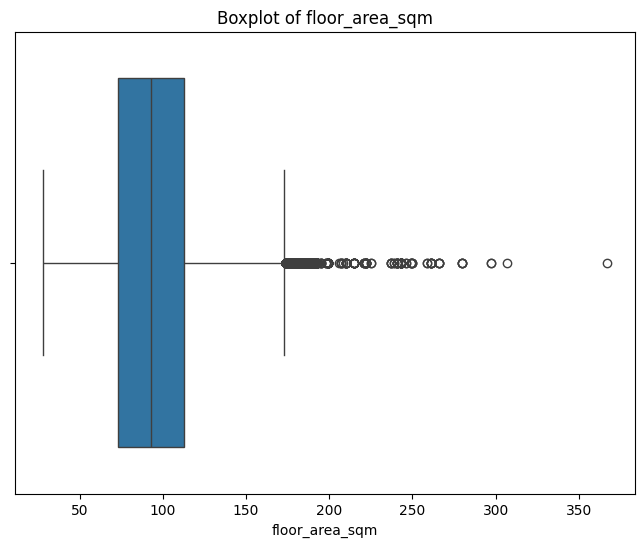

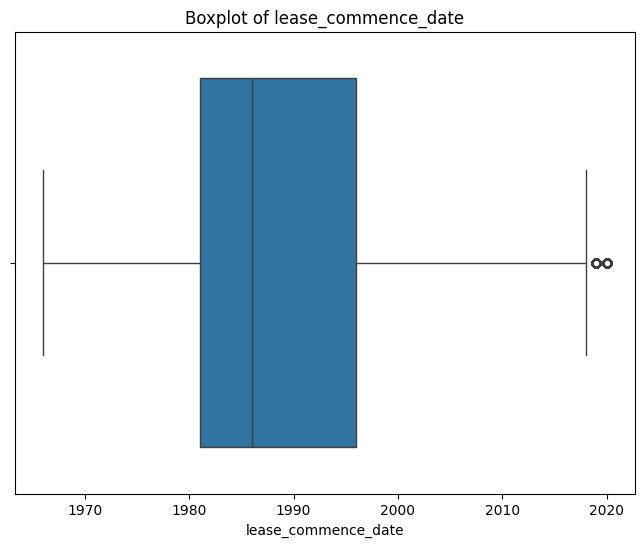

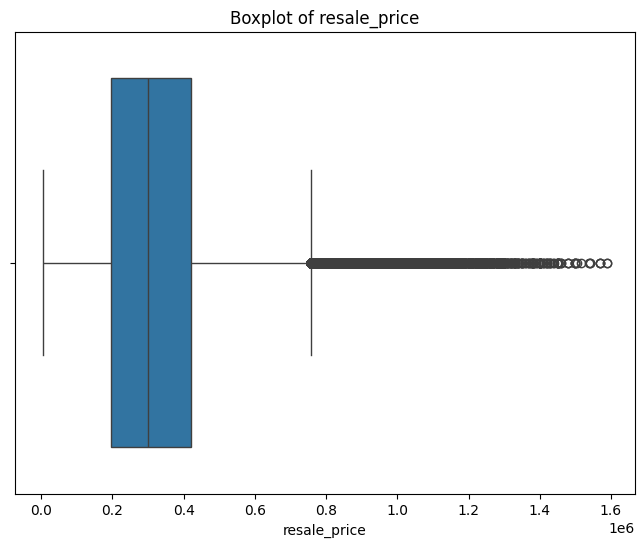

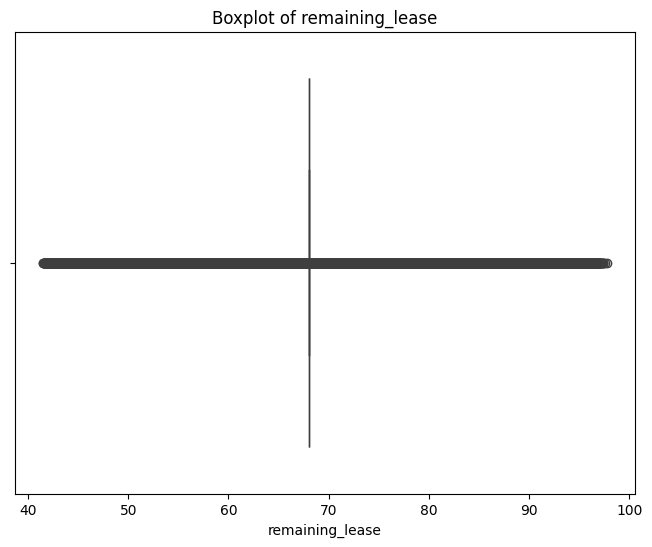

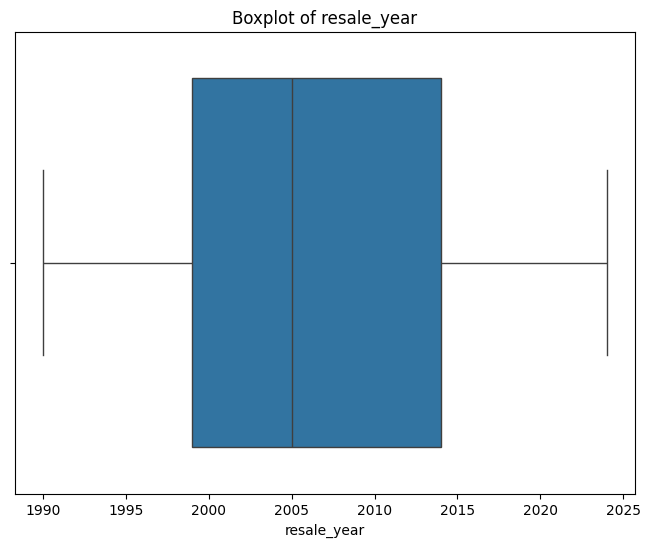

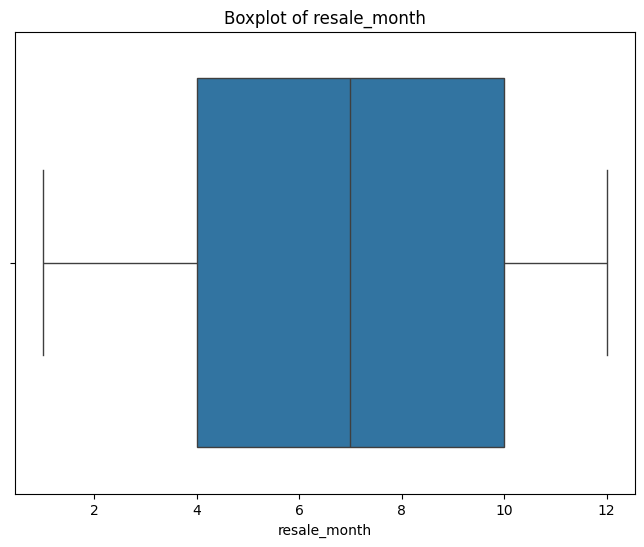

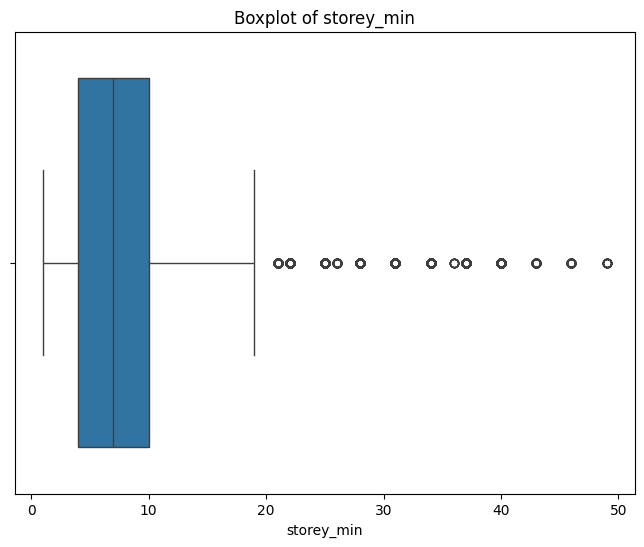

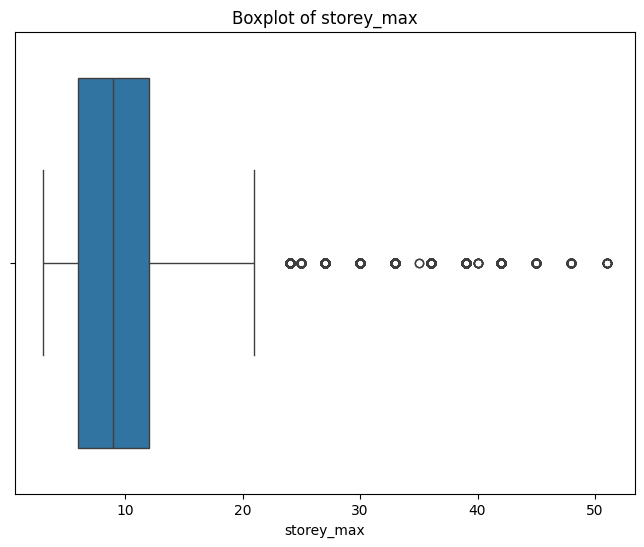

In [132]:
for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [133]:
df1=df[['floor_area_sqm','lease_commence_date','remaining_lease',
 'resale_year',
 'resale_month',
 'storey_min',
 'storey_max']]
df1

,floor_area_sqm,lease_commence_date,remaining_lease,resale_year,resale_month,storey_min,storey_max
0,31.0,1977,68.000000,1990,1,10,12
1,31.0,1977,68.000000,1990,1,4,6
2,31.0,1977,68.000000,1990,1,10,12
3,31.0,1977,68.000000,1990,1,7,9
4,73.0,1976,68.000000,1990,1,4,6
...,...,...,...,...,...,...,...
932367,93.0,2019,94.416667,2024,8,7,9
932368,91.0,1992,66.916667,2024,8,1,3
932369,84.0,1985,60.250000,2024,8,10,12
932370,121.0,1987,62.166667,2024,8,1,3


In [134]:

col1=['floor_area_sqm',
 'lease_commence_date',
 'remaining_lease',
 'resale_year',
 'resale_month',
 'storey_min',
 'storey_max']

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


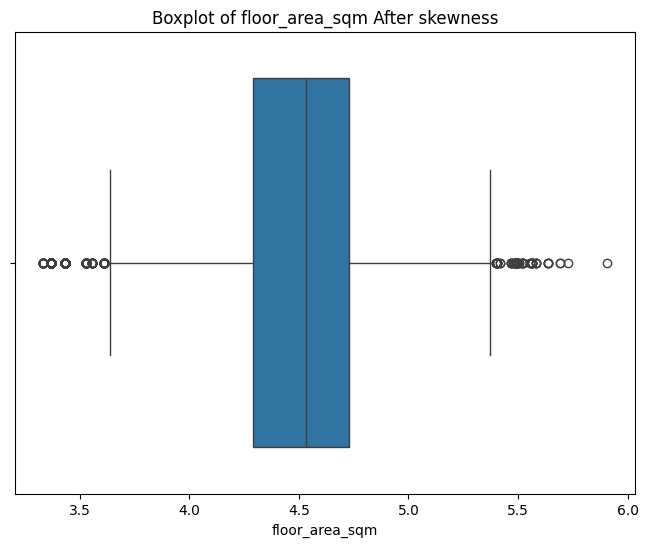

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


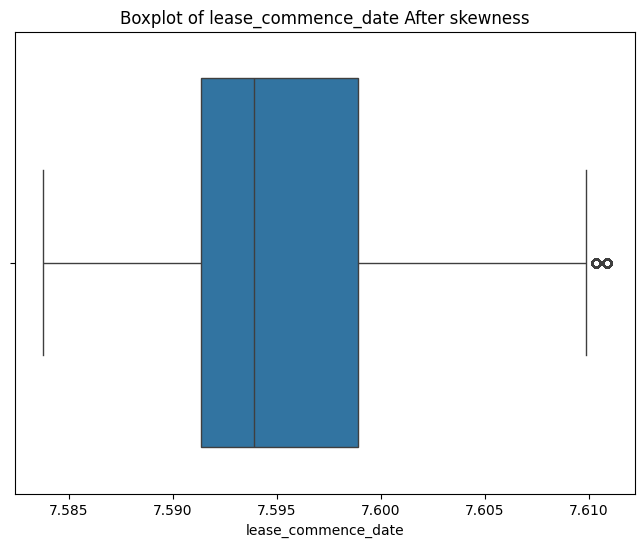

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


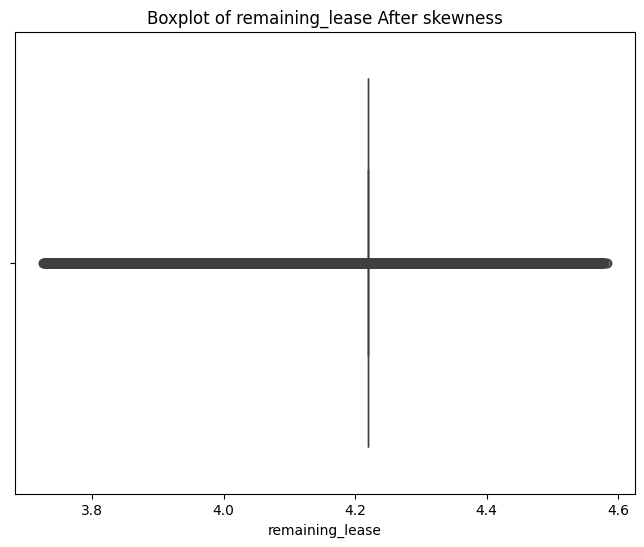

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


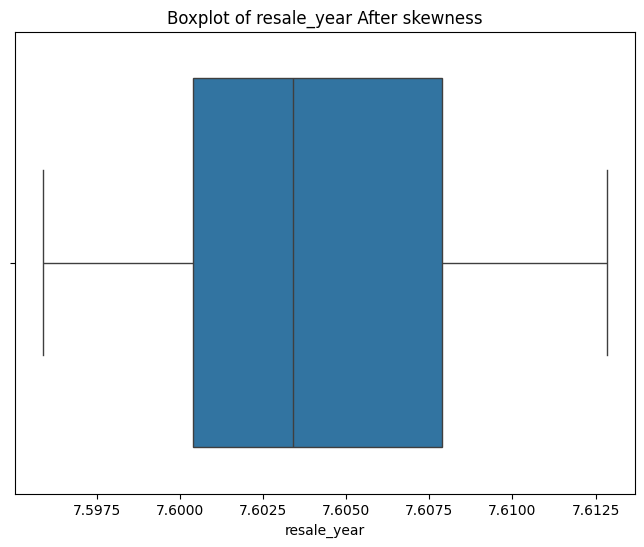

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


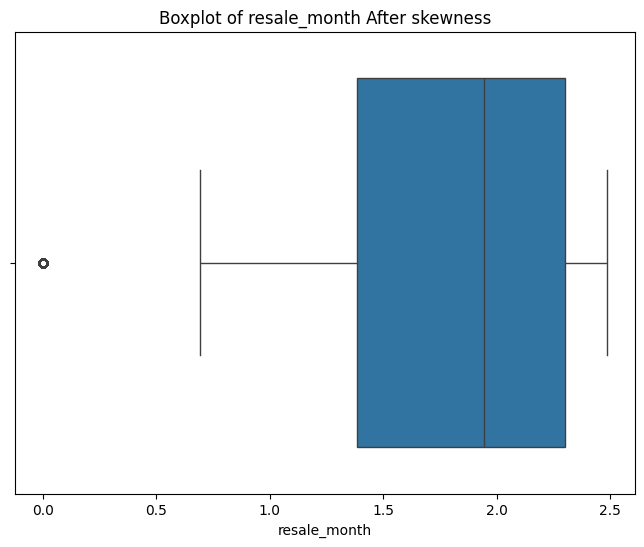

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


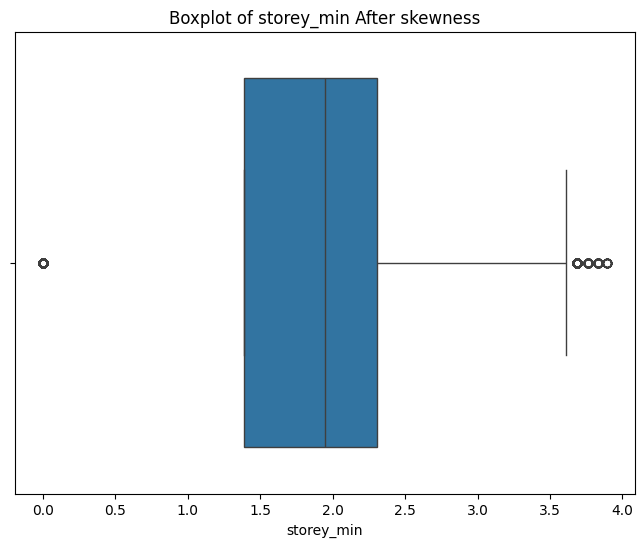

C:\Users\avmoh\AppData\Local\Temp\ipykernel_10416\724428905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=np.log(df1[i])


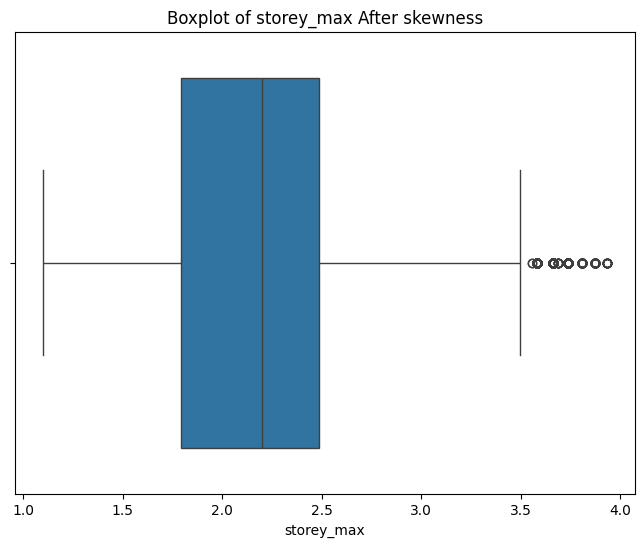

In [135]:
for i in col1:
    df1[i]=np.log(df1[i])
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df1, x=i)
    plt.title(f'Boxplot of {i} After skewness')
    plt.xlabel(i)
    plt.show()
    

In [136]:
col1

['floor_area_sqm',
 'lease_commence_date',
 'remaining_lease',
 'resale_year',
 'resale_month',
 'storey_min',
 'storey_max']

In [137]:
df1.dtypes

floor_area_sqm         float64
lease_commence_date    float64
remaining_lease        float64
resale_year            float64
resale_month           float64
storey_min             float64
storey_max             float64
dtype: object

<Axes: title={'center': 'Correlation Heatmap'}>

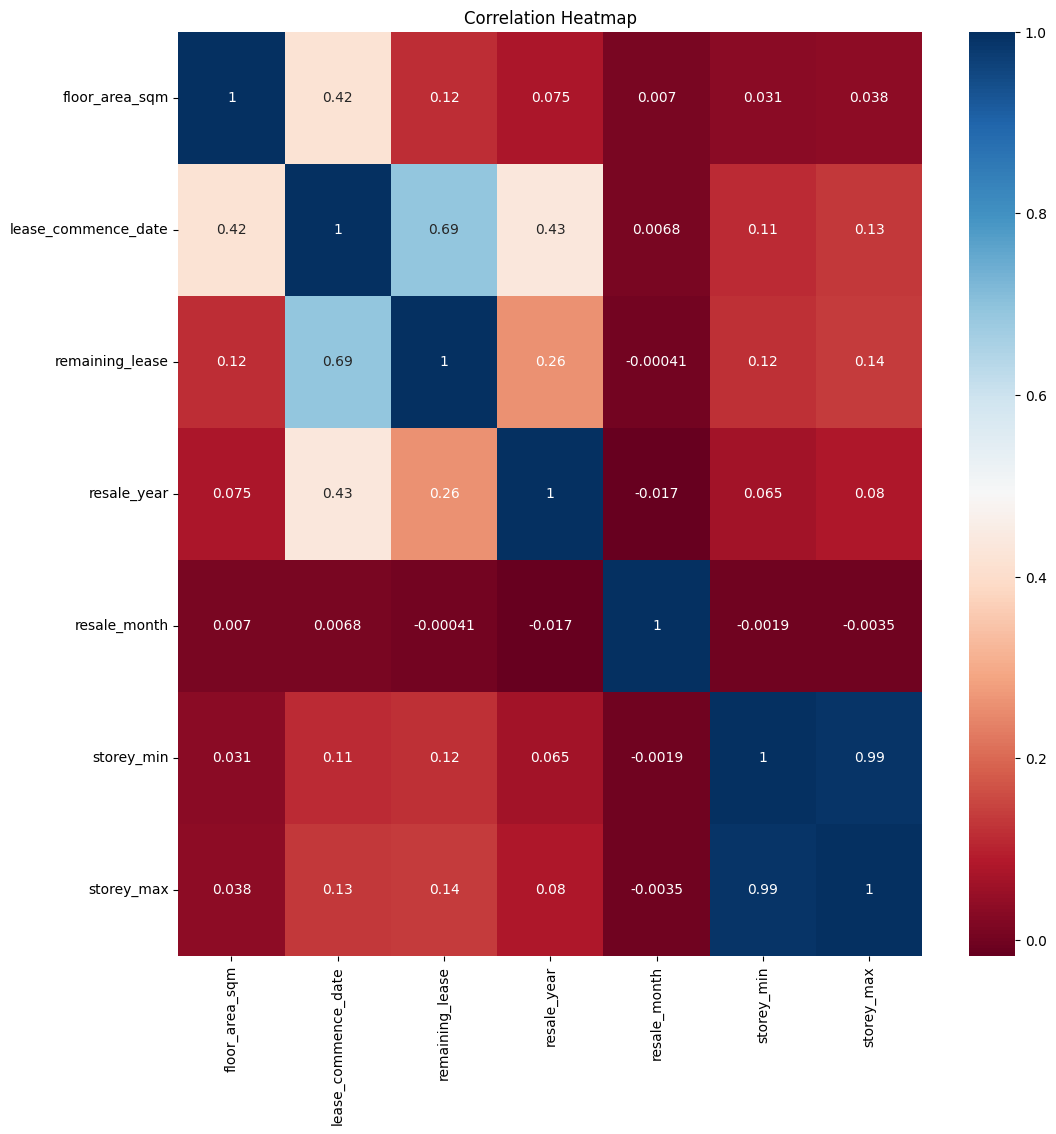

In [138]:
corrMatrix = df1.corr()
plt.figure(figsize=(12, 12))
plt.title("Correlation Heatmap")
sns.heatmap(
    df1.corr(), 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True)

In [139]:
df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,address,storey_min,storey_max
0,ANG MO KIO,1 ROOM,31.0,Improved,1977,9000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,10,12
1,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,4,6
2,ANG MO KIO,1 ROOM,31.0,Improved,1977,8000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,10,12
3,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,7,9
4,ANG MO KIO,3 ROOM,73.0,New Generation,1976,47200.0,68.000000,1990,1,216 BLOCK AND ANG MO KIO AVE 1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
932367,YISHUN,4 ROOM,93.0,Model A,2019,580000.0,94.416667,2024,8,468A BLOCK AND YISHUN ST 43,7,9
932368,YISHUN,4 ROOM,91.0,New Generation,1992,485000.0,66.916667,2024,8,640A BLOCK AND YISHUN ST 61,1,3
932369,YISHUN,4 ROOM,84.0,Simplified,1985,488000.0,60.250000,2024,8,762 BLOCK AND YISHUN ST 72,10,12
932370,YISHUN,5 ROOM,121.0,Improved,1987,630000.0,62.166667,2024,8,658 BLOCK AND YISHUN AVE 4,1,3


In [140]:
#for i in col1:
   # df[i]=np.log(df[i])

In [141]:
df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,address,storey_min,storey_max
0,ANG MO KIO,1 ROOM,31.0,Improved,1977,9000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,10,12
1,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,4,6
2,ANG MO KIO,1 ROOM,31.0,Improved,1977,8000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,10,12
3,ANG MO KIO,1 ROOM,31.0,Improved,1977,6000.0,68.000000,1990,1,309 BLOCK AND ANG MO KIO AVE 1,7,9
4,ANG MO KIO,3 ROOM,73.0,New Generation,1976,47200.0,68.000000,1990,1,216 BLOCK AND ANG MO KIO AVE 1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
932367,YISHUN,4 ROOM,93.0,Model A,2019,580000.0,94.416667,2024,8,468A BLOCK AND YISHUN ST 43,7,9
932368,YISHUN,4 ROOM,91.0,New Generation,1992,485000.0,66.916667,2024,8,640A BLOCK AND YISHUN ST 61,1,3
932369,YISHUN,4 ROOM,84.0,Simplified,1985,488000.0,60.250000,2024,8,762 BLOCK AND YISHUN ST 72,10,12
932370,YISHUN,5 ROOM,121.0,Improved,1987,630000.0,62.166667,2024,8,658 BLOCK AND YISHUN AVE 4,1,3


In [142]:
# low1= df['floor_area_sqm'] <= 0
# print(low1.sum())

# low2 = df['lease_commence_date'] <= 0
# print(low2.sum())

# low3 = df['remaining_lease'] <= 0
# print(low3.sum())

# low4 = df['resale_year'] <= 0
# print(low4.sum())

# low5 = df['resale_month'] <= 0
# print(low5.sum())

# low6 = df['storey_min'] <= 0
# print(low6.sum())

# low7 = df['storey_max'] <= 0
# print(low7.sum())


In [143]:
from sklearn.preprocessing import LabelEncoder




In [144]:
le1=LabelEncoder()
le1.fit(df["town"])
df['town']=le1.transform(df['town'])

le2=LabelEncoder()
le2.fit(df["flat_type"])
df['flat_type']=le2.transform(df['flat_type'])

le3=LabelEncoder()
le3.fit(df["flat_model"])
df['flat_model']=le3.transform(df['flat_model'])

le4=LabelEncoder()
le4.fit(df["address"])
df['address']=le4.transform(df['address'])



In [145]:
df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,address,storey_min,storey_max
0,0,0,31.0,5,1977,9000.0,68.000000,1990,1,3837,10,12
1,0,0,31.0,5,1977,6000.0,68.000000,1990,1,3837,4,6
2,0,0,31.0,5,1977,8000.0,68.000000,1990,1,3837,10,12
3,0,0,31.0,5,1977,6000.0,68.000000,1990,1,3837,7,9
4,0,2,73.0,12,1976,47200.0,68.000000,1990,1,2375,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
932367,26,3,93.0,8,2019,580000.0,94.416667,2024,8,5881,7,9
932368,26,3,91.0,12,1992,485000.0,66.916667,2024,8,7675,1,3
932369,26,3,84.0,16,1985,488000.0,60.250000,2024,8,8739,10,12
932370,26,4,121.0,5,1987,630000.0,62.166667,2024,8,7836,1,3


In [146]:
df.flat_model.unique()

array([ 5, 12,  8, 17, 16,  9,  3,  7, 18,  0,  6, 11, 13,  2, 15, 10,  4,
       19, 20, 14,  1])

In [147]:
from sklearn.model_selection import train_test_split


In [148]:
x=df.drop('resale_price',axis=1)
y=df.resale_price

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

TEST TRAIN DATA SPLIT

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=30)

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dt = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
gscv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
gscv.fit(x_train, y_train)
print("Best hyperparameters:", gscv.best_params_)
best_model = gscv.best_estimator_
y_pred = best_model.predict(x_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1320 fits failed out of a total of 3960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

Best hyperparameters: {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3}
Mean squared error: 1487258763.7851384
R-squared: 0.9500304878125188


In [152]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open ('le_town.pkl','wb') as f:
    pickle.dump(le1,f)
with open ('le_flat_type.pkl','wb') as f:
    pickle.dump(le2,f)
with open ('le_flat_model.pkl','wb') as f:
    pickle.dump(le3,f)
with open ('le_address.pkl','wb') as f:
    pickle.dump(le4,f)
    
    


In [153]:
gscv.best_params_

{'max_depth': 22,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [154]:
gscv.best_estimator_

DecisionTreeRegressor(max_depth=22, max_features='log2', min_samples_leaf=2,
                      min_samples_split=3)